# What is AI/ML and the theory of Neural Networks (Ben Floyd)

TASK:
Below we will see how to build a NN model in sklearn and PyTorch. Your task will be to build your own PyTorch model for thr fashionMNIST dataset.


## Artificial Intelligence, Machine Learning, and Neural Networks
Artificial intelligence is the field of research that involves methods to allow a machine to take input and make decisions based on that input. One of the methods used in this decision-making process is called "machine learning" where statistical models are used to process input data and perform tasks with this data without explict instructions. Neural networks are one such statistical model inspired by biological networks of neurons.

### Basic Theory of Neural Networks
<img alt="An example of a simple neural network with 6 input neurons, 2 hidden layers of 5 neurons each, and an output layer of 4 neurons. There are arrows connecting the neurons representing the weights in the network." height="400" src="./Resources/neural_network_diagram.png" title="Neural Network Diagram" width="400" align="center"/>

In a neural network, a neuron can be thought of a container that holds a number between `0` and `1` which indicates the strength of the "activation" of the neuron. (A better description would be that neurons are functions that map inputs to a value between `0` and `1`.) The neurons are connected with each other by weights that relate the association of neurons in one layer to neurons in another layer. A particular neuron's activation in the network is related to the wighted sum of all the activations of the neurons that connect to it proportional to the weight value connecting the neurons, $ w_{1} a_{1} + w_{2} a_{2} + \cdots + w_{n} a_{n} $. We also apply a function to the weighted sum to make sure that the output value is within `0` and `1`. This often comes in the form of a function called a rectified linear unit, or `ReLU` for short. Additionally, if we want the activation of our neuron to be biased—for example, if we wanted the neuron to only meaningfully activate if the weighted sum is $> 10$—then we can add a bias term, $b_{i}$ to our weighted sum before applying our ReLU function.
$$a_{0}^{(1)} = \sigma\left(\sum\limits_{j=0}^{n} w_{0, j} a_{j}^{(0)} - b_0\right)$$
This can all actually just be organized as a matrix operation,
$$ \begin{bmatrix} a_{0}^{(1)} \\ a_{1}^{(1)} \\ \vdots \\ a_{n}^{(1)} \end{bmatrix} = \sigma\left(\begin{bmatrix} w_{0,0} & w_{0,1} & \cdots & w_{0,n} \\ w_{1,0} & w_{1,1} & \cdots & w_{1,n} \\ \vdots & \vdots & \ddots & \vdots \\ w_{k,0} & w_{k,1} & \cdots & w_{k,n} \end{bmatrix} \begin{bmatrix} a_{0}^{(0)} \\ a_{1}^{(0)} \\ \vdots \\ a_{n}^{(0)} \end{bmatrix} + \begin{bmatrix} b_{0} \\ b_{1} \\ \vdots \\ b_{n} \end{bmatrix}\right)$$
Each layer in out network can be thought of as a series of matrix operations where our goal is to tune the values of the matrix elements in order to achieve a desired output based on some input data. This "training" process is where the neural network "learns" what values each matrix in the system needs to have in order to give the correct output.

## Machine Learning in Python
There are many different libraries in the Python ecosystem that provide machine learning methods. Some of the most popular are:
- [Scikit-learn](https://scikit-learn.org/stable/index.html)
- [TensorFlow](https://www.tensorflow.org/)
- [PyTorch](https://pytorch.org/)

We will also use several common libraries to help with managing or visualizing the data:
- [Numpy](https://numpy.org/)
- [Scipy](https://scipy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Pandas](https://pandas.pydata.org/)

While all the machine learning libraries can perform many of the same tasks, some libraries have strengths in certain tasks over each other. It's always a good idea to explore the different options for your use case to determine the right tool for the job.

Sckit-learn is a great entry point into machine learning, and it is a community-managed project based on Numpy and Scipy, also community-managed projects. It provides methods for many supervised and unsupervised learning algorithms with a simple API. We will explore this library in this notebook and later in the course as well.

TensorFlow is a powerful library developed and maintained by Google designed to work well on deep neural networks which have applications in a variety of complicated tasks. It uses tensors—multidimensional arrays similar to vectors and matrices—to represent the data and network.

PyTorch is one of the two most popular machine learning libraries (along with TensorFlow) in use today. It was originally developed by Meta but is now maintained as part of the Linux Foundation. Like TensorFlow, it operates on tensors and is useful for running deep neural networks on a variety of hardware setups. We will also look at this library in this notebook and throughout the course.

# AI/ML tools in Python
In this section, we are going to explore how to build a simple neural network to try to identify some handwritten digits using two of the most commonly used Python machine learning libraries: Scikit-learn and PyTorch

Before we begin, we need to import a few libraries that will help us throughout our examples.

In [1]:
import matplotlib.pyplot as plt  # This library allows us to create and display plots which we can use to explore our data
import numpy as np  # This library helps with a variety of mathematical and array tasks
from torchvision import datasets  # This library is part of the PyTorch project but is useful in general for us to get our dataset
from torchvision.transforms import ToTensor

## Data Exploration
Our training dataset is going to be the [MNIST database of handwritten digits](https://yann.lecun.com/exdb/mnist/).

<div class="alert alert-block alert-warning">

In these examples, we are going to use simple neural networks to perform image classification. In practice, you will likely want to use more sophisticated techniques like [convolutional neural networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) to do this type of task. However, in this notebook we are more interested in looking at how to use the Python machine learning libraries and the differences between the syntax of the libraries.

</div>

First we will import this well known datset using PyTorch. Documentation for the avalible PyTorch datasets are here: https://pytorch.org/vision/master/datasets.html

In [2]:
# This will download and create a dataset from the training set using a PyTorch module.
mnist_training = datasets.MNIST(root='Resources', train=True, download=True, transform=ToTensor())

# We will later use this dataset to test our trained neural network with.
mnist_testing = datasets.MNIST(root='Resources', train=False, download=True, transform=ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting Resources/MNIST/raw/train-images-idx3-ubyte.gz to Resources/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting Resources/MNIST/raw/train-labels-idx1-ubyte.gz to Resources/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting Resources/MNIST/raw/t10k-images-idx3-ubyte.gz to Resources/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting Resources/MNIST/raw/t10k-labels-idx1-ubyte.gz to Resources/MNIST/raw



We should always do some data exploration so that we know what our data looks like.

In [3]:
mnist_training

Dataset MNIST
    Number of datapoints: 60000
    Root location: Resources
    Split: Train
    StandardTransform
Transform: ToTensor()

Let's display the training data and the associated labels.

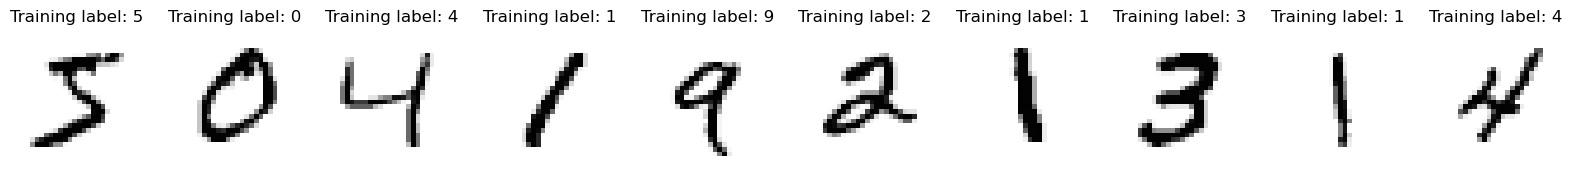

In [4]:
# We need to cast the data as Numpy arrays to use with Scikit-learn
training_images = mnist_training.data.numpy()
training_labels = mnist_training.targets.numpy()

# We will use the testing dataset later to see how our networks perform
testing_images = mnist_testing.data.numpy()
testing_labels = mnist_testing.targets.numpy()

fig, axes = plt.subplots(ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes.flatten(), training_images, training_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap='Greys')
    ax.set(title=f'Training label: {label}')
plt.show()

We also should look at the frequencies of the training labels to assess how potentially biased the data we are going to train the networks on will be.

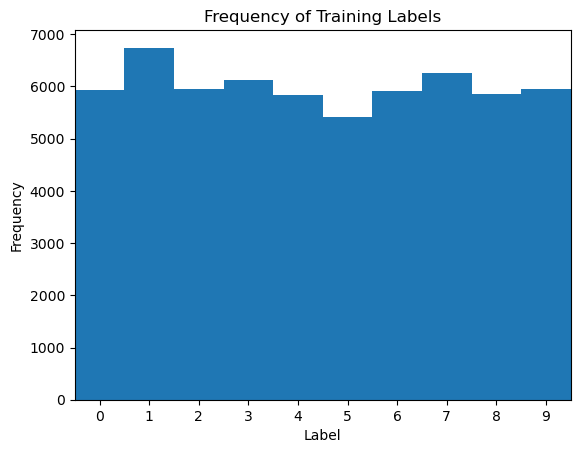

In [5]:
fig, ax = plt.subplots()
ax.hist(training_labels, bins=np.arange(11), align='left')
ax.set(title='Frequency of Training Labels', xlabel='Label', ylabel='Frequency', xlim=[-0.5, 9.5])
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

The above was using PyTorch - PyTorch is not the only place we could have gotten our datsets - the most common benchmarking datasets, and many of datasets and pretrained models are avlible through most packages. The sklearn version would have been:

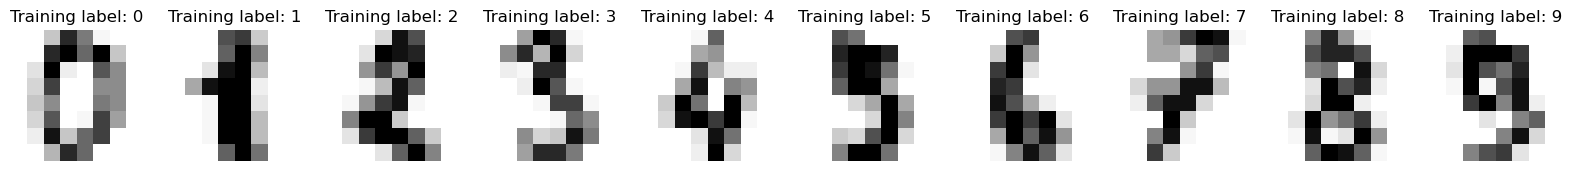

In [6]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets as sk_datasets

sk_digits = sk_datasets.load_digits()

fig, axes = plt.subplots(ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes.flatten(), sk_digits.images, sk_digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap='Greys')
    ax.set(title=f'Training label: {label}')
plt.show()

## Scikit-learn
Let's try to build and train a simple neural network with Scikit-learn to classify our digits.

One of Scikit-learn's strengths is that it is very entry-level user-friendly by providing a bunch of preset neural network and other machine learning processes. For our example, we will use the [multilayer perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).

In [7]:
from sklearn.neural_network import MLPClassifier  # This is sklearn's Multi-Layer Perceptron classifier
from sklearn import metrics  # We will use this throughout this notebook to analyze how our networks are performing.

Instead of trying to take the images as a grid of pixels, we will instead flatten our images into long, 1-dimensional arrays which will form our input layer for our very simple neural network.

In [8]:
training_data = training_images.reshape((len(training_images), -1))
training_data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

For this example, we will build a very simplistic neural network with 5 hidden layers of 16 neurons each. We will also specify that we are using a stochastic gradient descent method ('adam', the adaptive moment estimation) for our training of the network, we will use the rectified linear unit (ReLU) activation function that renormalizes the input for a neuron to specify the activity on the neuron. We will carry out 10,000 training iterations, and shuffle the data on each training epoch.

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(16, 5), solver='adam', activation='relu', max_iter=10_000, shuffle=True, random_state=1)

Now with our neural network set up, we can train it using our data. First, let's split the data into 50% training and testing datasets

In [10]:
# Train the network
clf.fit(training_data, training_labels)

MLPClassifier(hidden_layer_sizes=(16, 5), max_iter=10000, random_state=1)

We can take a look at the 'loss' function as this trained. In scikitlearn the final loos is stored as model_object.loss_ and the historical values that would make the curve are stored as model_object.loss_curve_

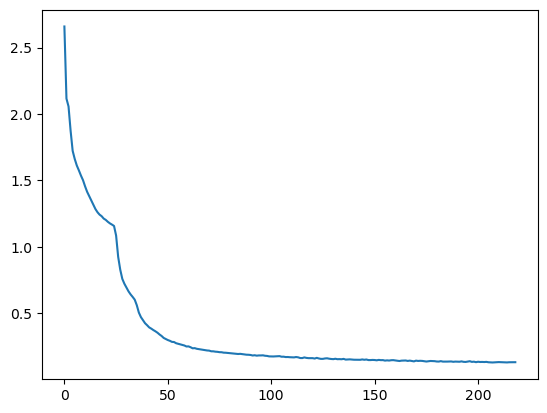

In [11]:
plt.plot(clf.loss_curve_)

With the network sufficiently trained (the loss curve is not changing greatly - although we will not know where we should have stopped training and if we are under- or over-trained unless we also tried the fit periodically through the training on a validation dataset), we can now use our test data to predict the values of the digits

In [12]:
predictions = clf.predict(testing_images.reshape((len(testing_images), -1)))

Let's display the first 6 test samples and their predicted labels.

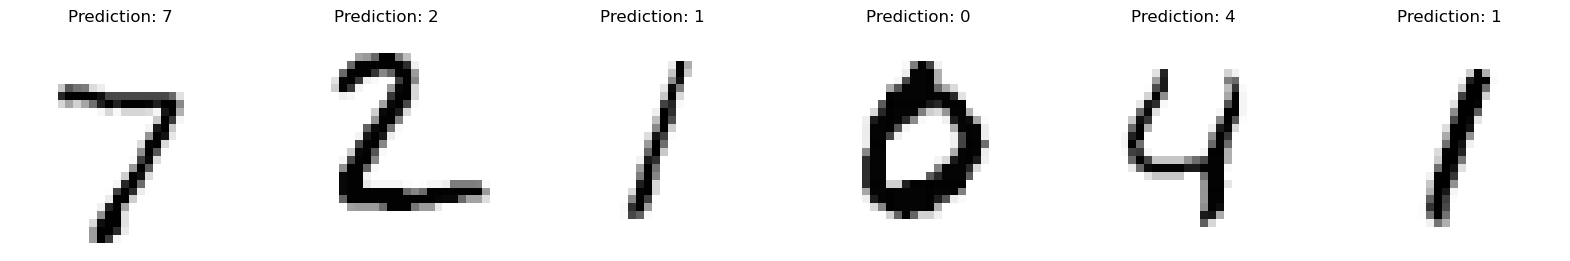

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,3))
for ax, image, prediction in zip(axes.flatten(), testing_images, predictions):
    ax.set_axis_off()
    ax.imshow(image, cmap='Greys')
    ax.set(title=f"Prediction: {prediction}")
plt.show()

The classification report below provides some of the main classification metrics for our output labels.

In [14]:
print(f"Classification report for {clf}:\n{metrics.classification_report(testing_labels, predictions)}")

Classification report for MLPClassifier(hidden_layer_sizes=(16, 5), max_iter=10000, random_state=1):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.96      0.91      0.93      1032
           3       0.91      0.93      0.92      1010
           4       0.94      0.93      0.93       982
           5       0.86      0.91      0.88       892
           6       0.95      0.94      0.94       958
           7       0.93      0.91      0.92      1028
           8       0.91      0.90      0.90       974
           9       0.89      0.90      0.89      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



The confusion matrix is another great diagnostic to see how our model has performed compared to the expected output.

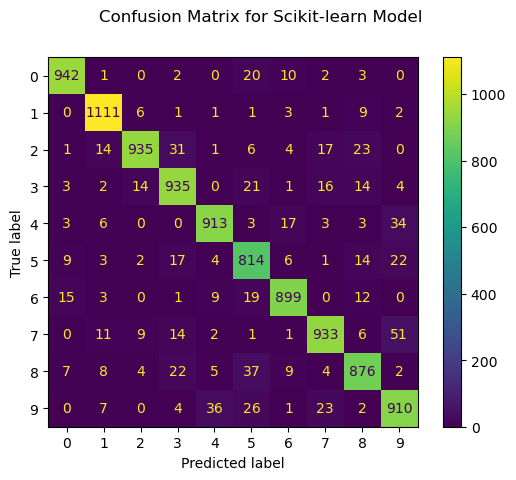

In [15]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(testing_labels, predictions)
disp.figure_.suptitle('Confusion Matrix for Scikit-learn Model')
plt.show()

## PyTorch
Now using PyTorch, we will try to perform the same example. PyTorch provides a more advanced API, allowing for us to target specific hardware to run our training on (so we can move toward deep learning with GPUs) and instead of just providing pre-constructed network options, PyTorch encourages us to define our own model explicitly. This allows us to have some finer control on how exactly we want to set up our network architecture.

In [16]:
import torch
# We are importing two PyTorch submodules, `nn` provides the neural network methods to define the neural network while `optim` provides the optimizer methods which we will use to define how our training will be done.
from torch import nn, optim
# PyTorch wraps its data into an iterable that allows us to break up our data into "minibatches" as we are training and allows multiprocessing to be done easily.
from torch.utils.data import DataLoader

pyTorch uses a `DataLoader` class to wrap an iterable around the dataset. If we were providing our own dataset, we would use the `Dataset` class to store the samples first.

In [17]:
train_loader = DataLoader(mnist_training, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_testing, batch_size=64, shuffle=True)

With PyTorch, we can directly target the hardware we have available so that we can run our network very efficiently.

In [18]:
device = (
    'cuda' if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu')
print(f'Using {device = }')

Using device = 'cpu'


PyTorch allows us to build the neural network layer by layer. Commonly (though it is not strictly required) this is done by defining a Python class. Like before, we will have 5 hidden layers of 16 neurons each using a ReLU normalization in between.

In [19]:
class NeuralNet(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # First, we will make sure that our input data is flattened.
        self.flatten = nn.Flatten()

        # Now we will define our network building sequential layers
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 16),  # This is our input layer
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 10)   # This is our output layer
        )

    def forward(self, x):
        """This method does the forward pass operation in the network."""
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Now that our model has been defined, we can initialize it and print it out.

In [20]:
model = NeuralNet().to(device)
print(model)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=10, bias=True)
  )
)


Here we are going to use the same stochastic gradient descent optimizer for training as we did in the previous example.

In [21]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

We will train the network using backpropagation just as before. But only over 5 epochs.

The steps here are:


In [22]:
model.train() # model is now in 'train' mode
for epoch in range(5):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad() #reset grdient to zero
        outputs = model(images) # predict outputs from inputs
        loss = nn.CrossEntropyLoss()(outputs, labels) # calculate loss
        loss.backward() # compute gradients using backpropagation
        optimizer.step() # update parameters

Now that our model has been trained, we can test it by evaluating our testing data

In [23]:
model.eval()
with torch.no_grad():
    predictions = model(torch.as_tensor(testing_images, dtype=torch.float).to(device))

Looking at some of our results. One thing to note about this PyTorch output is that the `predictions` object contains all the probabilities of the possible outputs. If we want to see the most likely output, we will need to take the maximum probable result. (Or add another activation function suchn as a sigmoid to the output layer of our neural network).

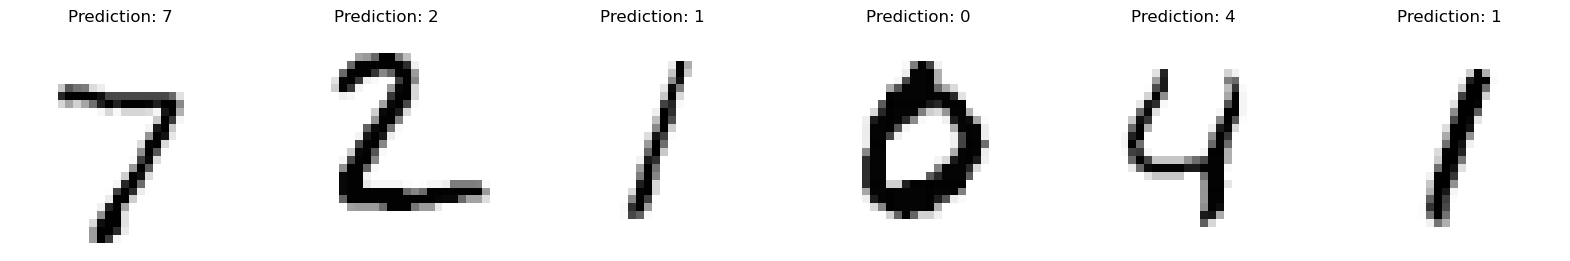

In [24]:
most_likely_output = predictions.data.max(dim=1)[1].cpu().numpy()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,3))
for ax, image, prediction in zip(axes.flatten(), testing_images, most_likely_output):
    ax.set_axis_off()
    ax.imshow(image, cmap='Greys')
    ax.set(title=f"Prediction: {prediction}")
plt.show()

And we can also use the Scikit-learn `classification_report` function and confusion matrix on our PyTorch results.

In [25]:
print(f'Classification report for PyTorch Model:\n{metrics.classification_report(testing_labels, most_likely_output)}')


Classification report for PyTorch Model:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.98      0.82      0.89      1032
           3       0.84      0.91      0.87      1010
           4       0.96      0.89      0.93       982
           5       0.90      0.91      0.90       892
           6       0.96      0.95      0.95       958
           7       0.94      0.94      0.94      1028
           8       0.91      0.89      0.90       974
           9       0.84      0.94      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



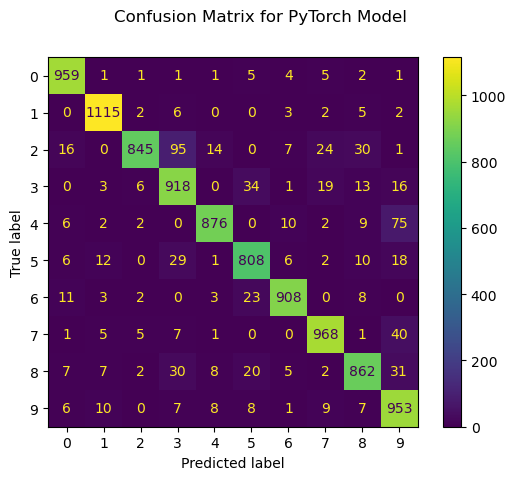

In [26]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(testing_labels, most_likely_output)
disp.figure_.suptitle('Confusion Matrix for PyTorch Model')
plt.show()

But we would like to see the loss function - AND - pytorch, tensorflow and other codes have the ability to take a separate validation set and print those too.

Let's start by makeing a train-test-split sample.

So we have:

In [27]:
import torchvision
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

VAL_SIZE = 0.1 # using 10% of our data
BATCH_SIZE = 64 # same size as above

# we already have located and downloaded our training and testing datasets
#mnist_training
#mnist_testing

# we use scikitlearn to create a train / vaidiation split for us which keeps balenced classes
# generate indices: instead of the actual data we pass in integers instead
train_indices, val_indices, _, _ = train_test_split(
    range(len(mnist_training)),
    mnist_training.targets,
    stratify=mnist_training.targets,
    test_size=VAL_SIZE,
)

# generate a subset based on the indices from this sklearn train_test_split routine
train_split = Subset(mnist_training, train_indices)
val_split = Subset(mnist_training, val_indices)

# create batches
train_batches = DataLoader(train_split, batch_size=BATCH_SIZE, shuffle=True)
val_batches = DataLoader(val_split, batch_size=BATCH_SIZE, shuffle=True)
test_batches = DataLoader(mnist_testing, batch_size=BATCH_SIZE, shuffle=True)

the model is going to stay the same and we'll use the same optimizer...

In [28]:
class NeuralNet(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # First, we will make sure that our input data is flattened.
        self.flatten = nn.Flatten()

        # Now we will define our network building sequential layers
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 16),  # This is our input layer
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 10)   # This is our output layer
        )

    def forward(self, x):
        """This method does the forward pass operation in the network."""
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNet().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

**BUT** we will change the training loop we had this before:

In [29]:
#model.train() # model is now in 'train' mode
#for epoch in range(5):
#    for images, labels in train_loader:
#        images, labels = images.to(device), labels.to(device)
#        optimizer.zero_grad() #reset grdient to zero
#        outputs = model(images) # predict outputs from inputs
#        loss = nn.CrossEntropyLoss()(outputs, labels) # calculate loss
#        loss.backward() # compute gradients using backpropagation
#        optimizer.step() # update parameters

And the steps we see in the comments are:

* model is now in 'train' mode
* reset grdient to zero
* predict outputs from inputs
* calculate loss
* compute gradients using backpropagation
* update parameters

We will now add

* compute accuracy and loss

In [31]:
def train(dataloader, model, optimizer): # we could pass a function for loss function in here too

    # Total size of dataset for reference
    size = 0
    model.train() # model is now in 'train' mode

    # storing stuff for when we compute accuracy and loss per batch
    batch_loss = {}
    batch_accuracy = {}
    correct = 0
    _correct = 0

    # Gives X , y for each batch (images and labels or 'outputs' for each batch for us)
    for batch, (X, y) in enumerate(dataloader):

        # the below is just like our images, labels = images.to(device), labels.to(device)
        X, y = X.to(device), y.to(device)
        model.to(device)
        optimizer.zero_grad() #reset grdient to zero
        y_pred = model(X) # outputs = model(images)
        loss = nn.CrossEntropyLoss()(y_pred, y) # calculate loss
        loss.backward() # compute gradients using backpropagation
        optimizer.step()  # update parameters

        #now we compute stuff
        _correct = (y_pred.argmax(1) == y).type(torch.float).sum().item()
        _batch_size = len(X)
        correct += _correct

        # Updating loss_batch and batch_accuracy
        batch_loss[batch] = loss.item()
        batch_accuracy[batch] = _correct/_batch_size

        size += _batch_size

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}]")

    correct/=size
    print(f"Train Accuracy: {(100*correct):>0.1f}%")

    return batch_loss , batch_accuracy

We do 'almost' the same thign with our validation sample but we don't update anything.

In [32]:
def validation(dataloader, model): # we could pass a function for loss function in here too

    # Total size of dataset for reference
    size = 0
    num_batches = len(dataloader)

    # Model is now in 'evaluation' mode.
    model.eval()

    test_loss, correct = 0, 0
    _correct = 0
    _batch_size = 0
    batch_loss = {}
    batch_accuracy = {}

    with torch.no_grad(): # we are not backpropagating and updating - we are only evaluating

        # Gives X , y for each batch
        for batch , (X, y) in enumerate(dataloader):

            X, y = X.to(device), y.to(device)
            model.to(device)
            y_pred = model(X)

            batch_loss[batch] = nn.CrossEntropyLoss()(y_pred, y)
            test_loss += batch_loss[batch]
            _batch_size = len(X)

            _correct = (y_pred.argmax(1) == y).type(torch.float).sum().item()
            correct += _correct

            size+=_batch_size
            batch_accuracy[batch] = _correct/_batch_size

    ## Calculating loss based on loss function defined
    test_loss /= num_batches

    ## Calculating Accuracy based on how many y match with y_pred
    correct /= size

    print(f"Valid Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return batch_loss , batch_accuracy

Then we train in epochs calling the train and validate samples

In [33]:
# define some empty lists to appeand results to
train_batch_loss = []
train_batch_accuracy = []
valid_batch_accuracy = []
valid_batch_loss = []
train_epoch_no = []
valid_epoch_no = []

# and let's run our train_batches and val_batches codes -
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    _train_batch_loss , _train_batch_accuracy = train(train_batches, model, optimizer)
    _valid_batch_loss , _valid_batch_accuracy = validation(val_batches, model)
    for i in range(len(_train_batch_loss)):
        train_batch_loss.append(_train_batch_loss[i])
        train_batch_accuracy.append(_train_batch_accuracy[i])
        train_epoch_no.append( t + float((i+1)/len(_train_batch_loss)))
    for i in range(len(_valid_batch_loss)):
        valid_batch_loss.append(_valid_batch_loss[i])
        valid_batch_accuracy.append(_valid_batch_accuracy[i])
        valid_epoch_no.append( t + float((i+1)/len(_valid_batch_loss)))
print("Done!")

Epoch 1
-------------------------------
loss: 2.335364  [    0]
loss: 1.389397  [ 6400]
loss: 0.918376  [12800]
loss: 0.858763  [19200]
loss: 0.951180  [25600]
loss: 0.556343  [32000]
loss: 0.390199  [38400]
loss: 0.524257  [44800]
loss: 0.592038  [51200]
Train Accuracy: 67.3%
Valid Error: 
 Accuracy: 82.4%, Avg loss: 0.574235 

Epoch 2
-------------------------------
loss: 0.496305  [    0]
loss: 0.490826  [ 6400]
loss: 0.481814  [12800]
loss: 0.640193  [19200]
loss: 0.388850  [25600]
loss: 0.491841  [32000]
loss: 0.451382  [38400]
loss: 0.649399  [44800]
loss: 0.577265  [51200]
Train Accuracy: 86.9%
Valid Error: 
 Accuracy: 90.1%, Avg loss: 0.373301 

Epoch 3
-------------------------------
loss: 0.230313  [    0]
loss: 0.335032  [ 6400]
loss: 0.170186  [12800]
loss: 0.135578  [19200]
loss: 0.249519  [25600]
loss: 0.342181  [32000]
loss: 0.417404  [38400]
loss: 0.405339  [44800]
loss: 0.344943  [51200]
Train Accuracy: 90.4%
Valid Error: 
 Accuracy: 91.7%, Avg loss: 0.307168 

Epoch 4

And let's plot our losses...

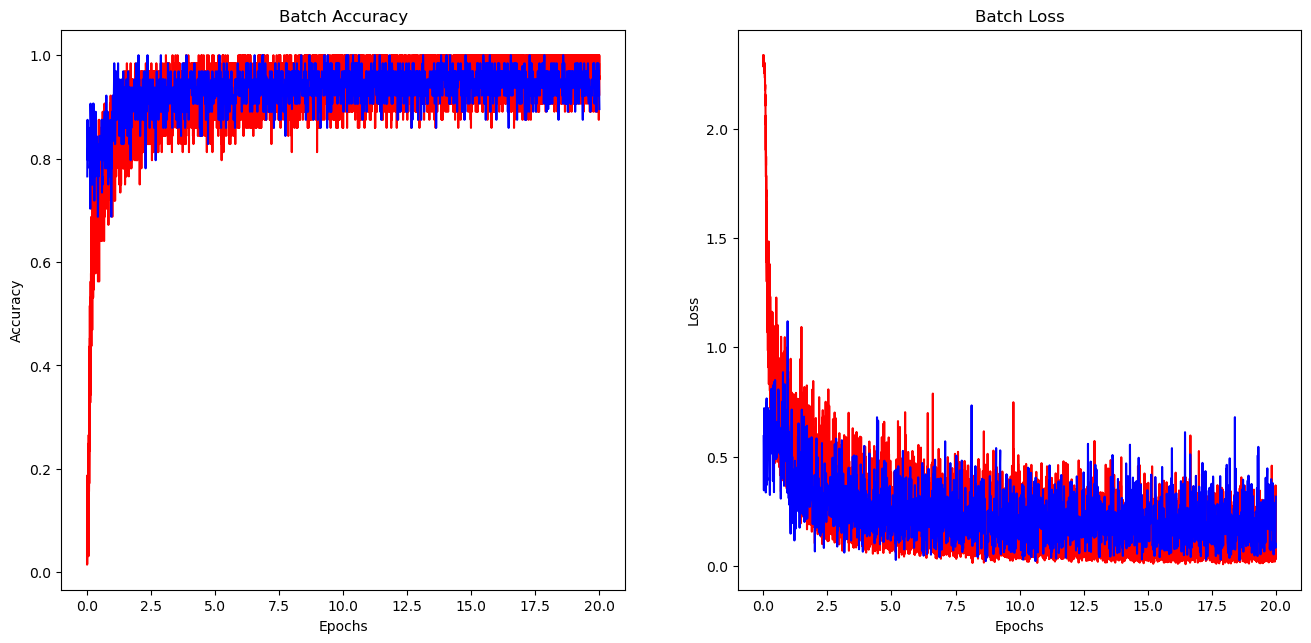

In [34]:
figure = plt.figure(figsize=(16, 16))

figure.add_subplot(2, 2, 1)
plt.plot(train_epoch_no , train_batch_accuracy, color='red', label='Train')
plt.plot(valid_epoch_no , valid_batch_accuracy, color='blue', label='Validation')
plt.title("Batch Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

figure.add_subplot(2, 2, 2)
plt.plot(train_epoch_no , train_batch_loss, color='red', label='Train')
plt.plot(valid_epoch_no , valid_batch_loss, color='blue', label='Validation')
plt.title("Batch Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

# TASK:

In PyTorch build a simple model, similar to the one above for the fashionMNIST datset.